# Data Modeling

It is now time to begin the actual modeling of our data to create prediction models for whether someone is susceptible to being a user of our target variables, alcohol, cocaine, and benzodiazepines. As seen in the exploration notebook, the distributions of alcohol vs the other two categories seem to be quite different. We also saw how each substance had different feature importances, and from the PCA, we saw how the users of alcohol were quite different from the other two. Because of these reasons, it may be beneficial to model each substance separately, as different models may work better or worse for different substances. Since we have already converted our target variable values to 0 (for non-user) and 1 (for user), we will need to use models well suited for binary classification. 

We will start with creating a prediction model for alcohol, then move on to cocaine, and lastly benzos. Let's begin by importing the necessary packages as well as our training and testing sets. 

In [476]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import fbeta_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

In [477]:
X_train = pd.read_csv("../data/X_train.csv", index_col=0)
y_train = pd.read_csv("../data/y_train.csv", index_col=0)
X_test = pd.read_csv("../data/X_test.csv", index_col=0)
y_test = pd.read_csv("../data/y_test.csv", index_col=0)
X_train

,n_score,e_score,o_score,a_score,c_score,i_score,s_score,age_25-34,age_35-44,age_45-54,age_55+,gender_Female,education_Graduate Degree,education_Left School before College,education_Professional Certificate/Diploma,education_University Degree,residing_country_Other,residing_country_USA
0,-1.208387,-1.869651,-3.005394,-1.490992,0.351938,0.573531,-2.037871,0,0,0,1,1,0,1,0,0,0,0
1,0.212708,1.570018,0.177548,-1.645030,-1.078167,0.573531,0.530485,0,0,0,0,0,1,0,0,0,0,1
2,0.977913,-0.224592,-1.641276,-0.412728,-0.220104,-0.367862,-0.203331,0,1,0,0,0,0,1,0,0,0,0
3,-0.989757,1.719569,0.632254,-1.336954,1.066990,0.573531,1.264301,0,0,0,0,0,0,0,0,0,0,1
4,1.305858,1.121366,-0.580295,-2.261180,-0.649135,1.985620,0.530485,0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1121,1.305858,-1.271448,-1.792845,-1.028879,-0.649135,1.985620,0.163577,0,1,0,0,0,0,0,1,0,0,0
1122,-1.645648,-1.121897,1.086960,-0.412728,-0.649135,-0.838559,0.163577,0,0,0,1,1,0,0,0,1,1,0
1123,0.540653,-0.075041,0.329117,0.049385,-0.935156,0.573531,0.530485,0,0,0,0,0,0,0,0,0,0,0
1124,-0.115237,1.121366,0.935391,0.203423,0.065917,0.573531,0.163577,1,0,0,0,1,0,0,0,1,0,0


## Alcohol Use - Prediction Model

### Logistic Regression

Let's start with Logistic Regression as our first model to predict alcohol use. Logistic Regression takes a regularization parameter C. We will use GridSearchCV to determine the C value that gives the best value. Let's first train and test the model without any hyperparameter tuning to see how it performs. Our evaluation metric going forward will be the ROC AUC Score. 

In [478]:
#Initialize the Logistic Regression Classifier
lr = LogisticRegression()
#fit the model to the training data
lr.fit(X_train, y_train.alcohol)
#Predict target variable using the test set and evaluate using roc_auc score
y_pred = lr.predict_proba(X_test)[:,1]
roc_auc_score(y_test.alcohol, y_pred)

0.6433631167994849

Without any hyperparameter tuning, we get a roc_auc score of about 0.5832. Let's see if we can do better by tuning the regularization parameter. 

In [479]:
#Initialize the Logistic Regression Classifier
lr = LogisticRegression()

#Define set of C values to test
params_lr = {'C': [0.0001, 0.001, 0.1, 1, 10, 100]} 

#Use GridSearchCV, with roc_auc as the scoring guideline
gs_lr_alc = GridSearchCV(lr, param_grid=params_lr, scoring='roc_auc', cv=5)
gs_lr_alc.fit(X_train, y_train.alcohol)

print('Best parameters: ', gs_lr_alc.best_params_)
print('Best score: ', gs_lr_alc.best_score_ ) 

Best parameters:  {'C': 100}
Best score:  0.6242547313782936


We see the best regularization parameter is 1, giving an roc_auc score of about 0.6446. This C value is the same as the default used previously, so we will get the same roc_auc value as before, see below. 

In [480]:
#Initialize new LogisticRegression object, using the optimal C-vlaue
lr_alc = LogisticRegression(C = gs_lr_alc.best_params_['C'])
lr_alc.fit(X_train, y_train.alcohol)
y_pred_lr_alc = lr_alc.predict_proba(X_test)[:,1]

roc_auc_score(y_test.alcohol, y_pred_lr_alc)

0.643113579650648

Let's move on to a random forest model to see if we can do better. 

### Random Forest

Like before, let's start by training a RF model without any hyperparameter tuning to see how it performs. 

In [481]:
#Initialize the Random Forest Classifier
rfc = RandomForestClassifier(random_state = 21)
#fit the model to the training data
rfc.fit(X_train, y_train.alcohol)
#Predict target variable using the test set and evaluate using roc_auc score
y_pred = rfc.predict_proba(X_test)[:,1]
roc_auc_score(y_test.alcohol, y_pred)

0.614509377767045

This performs slightly worse than the Logistic Regression model with all default hyperparameters. 

For Random Forest, there are several different hyperparameters that can be tuned to optimize our model with scikit-learn. We will focus on tuning n_estimators (the number of trees), max_features (max number of features to consider at every split), max_depth (max number of levels allowed in each tree), min_samples_split (minimum sample number to split a node), min_samples_leaf (minimum sample number that can be stored in a leaf node), and bootstrap (the method for sampling the data points). 

In [482]:
#set the values for hyperparameters that we want to test
n_estimators = [20,50,100] 
max_features = ['auto', 'sqrt'] 
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)]
min_samples_split = [2, 6, 10] 
min_samples_leaf = [1, 3, 4]
bootstrap = [True, False]

In [483]:
#set the parameter grid
params_rfc = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [484]:
#Use grid search to find the best parameters
rfc = RandomForestClassifier()
gs_rfc_alc = GridSearchCV(rfc, param_grid=params_rfc, scoring='roc_auc', cv=3)
gs_rfc_alc.fit(X_train, y_train.alcohol)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100,
                                       110, 120],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 3, 4],
                         'min_samples_split': [2, 6, 10],
                         'n_estimators': [20, 50, 100]},
             scoring='roc_auc')

In [485]:
gs_rfc_alc.best_params_

{'bootstrap': True,
 'max_depth': 90,
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 50}

In [486]:
rfc_alc = RandomForestClassifier(bootstrap = gs_rfc_alc.best_params_['bootstrap'], 
                              max_depth = gs_rfc_alc.best_params_['max_depth'], 
                              max_features = gs_rfc_alc.best_params_['max_features'], 
                              min_samples_leaf = gs_rfc_alc.best_params_['min_samples_leaf'],
                              min_samples_split = gs_rfc_alc.best_params_['min_samples_split'], 
                              n_estimators = gs_rfc_alc.best_params_['n_estimators'], 
                              random_state = 21)
rfc_alc.fit(X_train, y_train.alcohol)
y_pred_rfc_alc = rfc_alc.predict_proba(X_test)[:,1]

roc_auc_score(y_test.alcohol, y_pred_rfc_alc)

0.628720920872575

We see the model improved a little bit with hyperparamter tuning, but not by much. Also, this is just slightly above the performance of the logistic regression model, but took much longer to run. Because of this computing time, logistic regression still seems to be our best model. 

### K-Nearest Neighbors

The last model we will test for alcohol use prediction is a Knn model. As before, we will first test without hyperparameter tuning. 

In [487]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train.alcohol)
y_pred = knn.predict_proba(X_test)[:,1]
roc_auc_score(y_test.alcohol, y_pred)

0.5671174434516623

The default k value is 5. We will now try using GridSearch to test k-values between 1 and 50. 

In [488]:
#create new a knn model
knn = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 50)}
#use gridsearch to test all values for n_neighbors
gs_knn_alc = GridSearchCV(knn, param_grid, cv=5)
#fit model to data
gs_knn_alc.fit(X_train, y_train.alcohol)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [489]:
gs_knn_alc.best_params_

{'n_neighbors': 47}

In [490]:
knn_alc = KNeighborsClassifier(n_neighbors=gs_knn_alc.best_params_['n_neighbors'])
knn_alc.fit(X_train, y_train.alcohol)
y_pred_knn_alc = knn_alc.predict_proba(X_test)[:,1]
roc_auc_score(y_test.alcohol, y_pred_knn_alc)

0.5741487563390486

### Final Model for Alcohol

None of the models we have tried have performed well for alcohol, which makes some sense as it would be quite hard to predict who is more likely to abuse a substance as widely and frequently used as alcohol is. People with all sorts of personality types, from all age groups and education levels, and from all over the world consume alcohol somewhat regularly so it would be difficult to create a prediction model without further data collection on the individuals and their lifestyle/habits. Let us look more closely at the performance of our random forest model, which seemed to perform the best out of the three models we tried. 

In [491]:
#Defining a function that returns precision recall and f_beta score
#We will plot them against different thresholds

def precision_recall(model, X_test, y_test, threshold, beta = 1):
    
    y_pred = (model.predict_proba(X_test)[:,1] >= threshold).astype(bool)
    matrix = confusion_matrix(y_test, y_pred)
    
    #print(threshold,'\n', matrix)
    
    tn = matrix[0,0] # Respondents predicted to be non-users and were non-users
    tp = matrix[1,1] # Respondents predicted to be users and were users
    fp = matrix[0,1] # Respondents predicted to be users and were non-users
    fn = matrix[1,0] # Respondents predicted to be non-users and were users
    
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    #fdr = fp/(fp+tp)
    #f_beta = fbeta_score(y_test, y_pred, beta=beta)
    
    return([precision, recall])

In [492]:
threshold_df_alc = pd.DataFrame(columns=['Precision','Recall'])

for threshold in sorted(set(lr_alc.predict_proba(X_test)[:,1])):
    threshold_df_alc.loc[threshold] = precision_recall(lr_alc, X_test, y_test.alcohol, threshold)

Text(0.48, 0.55, 'Optimal Threshold')

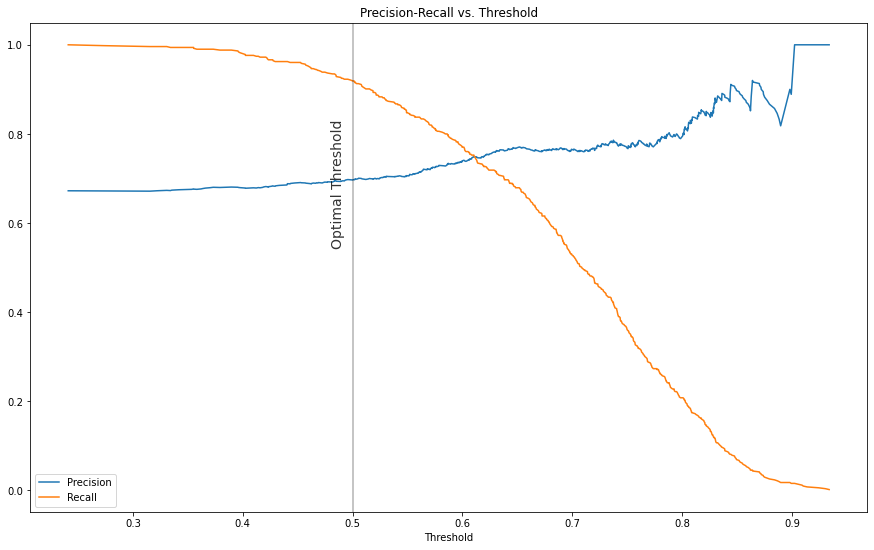

In [493]:
ax = threshold_df_alc.plot(figsize=(15,9))
ax.set_xlabel('Threshold')
ax.set_title('Precision-Recall vs. Threshold')
ax.axvline(0.5, color='black', alpha=0.3)
ax.text(.48,.55,'Optimal Threshold',rotation=90, alpha=0.8, fontsize=14)

In this business case, we would rather maximize recall than precision. So, o get a precision of at least 0.70 while maximizing recall, we will choose a threshold of 0.5. 

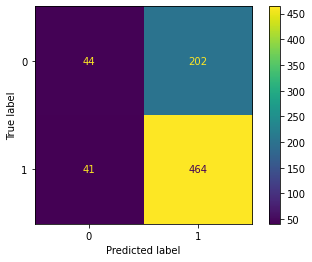

In [494]:
cm = confusion_matrix(y_test.alcohol, lr_alc.predict_proba(X_test)[:,1] > .5)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [495]:
print(classification_report(y_test.alcohol, lr_alc.predict_proba(X_test)[:,1] > .50))

              precision    recall  f1-score   support

           0       0.52      0.18      0.27       246
           1       0.70      0.92      0.79       505

    accuracy                           0.68       751
   macro avg       0.61      0.55      0.53       751
weighted avg       0.64      0.68      0.62       751



## Cocaine Use - Prediction Model

We will largely follow the same process as with alcohol, using logistic regression, random forest, and knn models and deciding which performs best at the end based off of ROC AUC Scores. 

### Logistic Regression

In [496]:
#Initialize the Logistic Regression Classifier
lr = LogisticRegression()
#fit the model to the training data
lr.fit(X_train, y_train.cocaine)
#Predict target variable using the test set and evaluate using roc_auc score
y_pred = lr.predict_proba(X_test)[:,1]
roc_auc_score(y_test.cocaine, y_pred)

0.7695191020492225

In [497]:
#Initialize the Logistic Regression Classifier
lr = LogisticRegression()

#Define set of C values to test
params_lr = {'C': [0.0001, 0.001, 0.1, 1, 10, 100]} 

#Use GridSearchCV, with roc_auc as the scoring guideline
gs_lr_coc = GridSearchCV(lr, param_grid=params_lr, scoring='roc_auc', cv=5)
gs_lr_coc.fit(X_train, y_train.cocaine)

print('Best parameters: ', gs_lr_coc.best_params_)
print('Best score: ', gs_lr_coc.best_score_ ) 

Best parameters:  {'C': 0.1}
Best score:  0.7628739888682745


In [498]:
#Initialize new LogisticRegression object, using the optimal C-vlaue
lr_coc = LogisticRegression(C = gs_lr_coc.best_params_['C'])
lr_coc.fit(X_train, y_train.cocaine)
y_pred_lr_coc = lr_coc.predict_proba(X_test)[:,1]

roc_auc_score(y_test.cocaine, y_pred_lr_coc)

0.7693543404386777

### Random Forest

In [499]:
#Initialize the Random Forest Classifier
rfc = RandomForestClassifier(random_state = 21)
#fit the model to the training data
rfc.fit(X_train, y_train.cocaine)
#Predict target variable using the test set and evaluate using roc_auc score
y_pred = rfc.predict_proba(X_test)[:,1]
roc_auc_score(y_test.cocaine, y_pred)

0.7416383482648542

In [500]:
rfc = RandomForestClassifier()
gs_rfc_coc = GridSearchCV(rfc, param_grid=params_rfc, scoring='roc_auc', cv=3)
gs_rfc_coc.fit(X_train, y_train.cocaine)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100,
                                       110, 120],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 3, 4],
                         'min_samples_split': [2, 6, 10],
                         'n_estimators': [20, 50, 100]},
             scoring='roc_auc')

In [501]:
gs_rfc_coc.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 6,
 'n_estimators': 100}

In [502]:
rfc_coc = RandomForestClassifier(bootstrap = gs_rfc_coc.best_params_['bootstrap'], 
                                 max_depth = gs_rfc_coc.best_params_['max_depth'], 
                                 max_features = gs_rfc_coc.best_params_['max_features'], 
                                 min_samples_leaf = gs_rfc_coc.best_params_['min_samples_leaf'],
                                 min_samples_split = gs_rfc_coc.best_params_['min_samples_split'], 
                                 n_estimators = gs_rfc_coc.best_params_['n_estimators'], 
                                 random_state = 21)
rfc_coc.fit(X_train, y_train.cocaine)
y_pred_rfc_coc = rfc_coc.predict_proba(X_test)[:,1]

roc_auc_score(y_test.cocaine, y_pred_rfc_coc)

0.7487591391205849

### K-Nearest Neighbors

In [503]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train.cocaine)
y_pred = knn.predict_proba(X_test)[:,1]
roc_auc_score(y_test.cocaine, y_pred)

0.7129337864277623

In [504]:
#create new a knn model
knn = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 50)}
#use gridsearch to test all values for n_neighbors
gs_knn_coc = GridSearchCV(knn, param_grid, cv=5)
#fit model to data
gs_knn_coc.fit(X_train, y_train.cocaine)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [505]:
gs_knn_coc.best_params_

{'n_neighbors': 10}

In [506]:
knn_coc = KNeighborsClassifier(n_neighbors=gs_knn_coc.best_params_['n_neighbors'])
knn_coc.fit(X_train, y_train.cocaine)
y_pred_knn_coc = knn_coc.predict_proba(X_test)[:,1]
roc_auc_score(y_test.cocaine, y_pred_knn_coc)

0.7370559159715786

### Cocaine Final Model

In [507]:
threshold_df_coc = pd.DataFrame(columns=['Precision','Recall'])

for threshold in sorted(set(lr_coc.predict_proba(X_test)[:,1])):
    threshold_df_coc.loc[threshold] = precision_recall(lr_coc, X_test, y_test.cocaine, threshold)

Text(0.21, 0.6, 'Optimal Threshold')

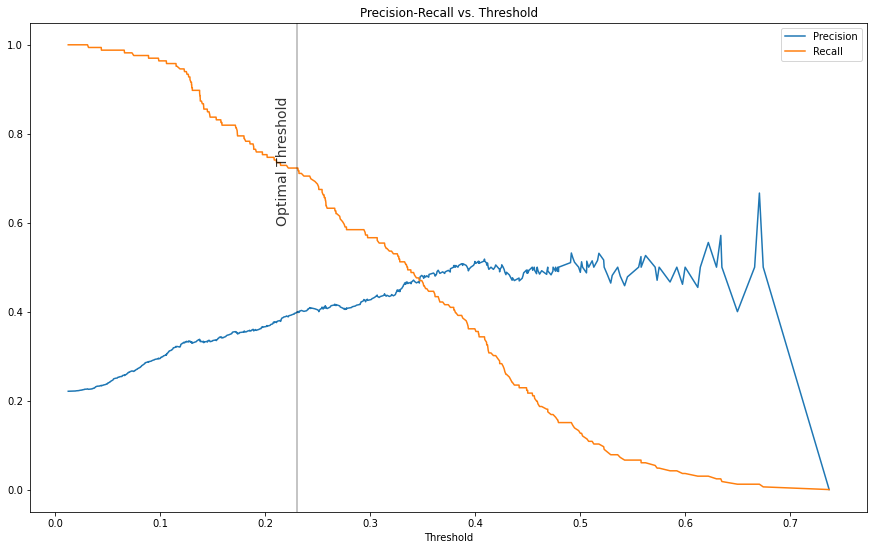

In [508]:
ax = threshold_df_coc.plot(figsize=(15,9))
ax.set_xlabel('Threshold')
ax.set_title('Precision-Recall vs. Threshold')
ax.axvline(0.23, color='black', alpha=0.3)
ax.text(.21,.60,'Optimal Threshold',rotation=90, alpha=0.8, fontsize=14)

To get a precision of at least 0.4 while maximizing recall, we will choose an optimal threshold of 0.23. 

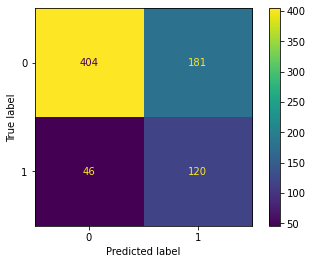

In [509]:
cm = confusion_matrix(y_test.cocaine, lr_coc.predict_proba(X_test)[:,1] > .23)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [510]:
print(classification_report(y_test.cocaine, lr_coc.predict_proba(X_test)[:,1] > .23))

              precision    recall  f1-score   support

           0       0.90      0.69      0.78       585
           1       0.40      0.72      0.51       166

    accuracy                           0.70       751
   macro avg       0.65      0.71      0.65       751
weighted avg       0.79      0.70      0.72       751



## Benzodiazepine Prediction Model

### Logistic Regression

Again, we will be following the same process as before for each model, where we first test the model without any hyperparameter tuning, and then with tuning. 

In [511]:
lr = LogisticRegression()
lr.fit(X_train, y_train.benzos)
y_pred = lr.predict_proba(X_test)[:,1]
roc_auc_score(y_test.benzos, y_pred)

0.7620067014147431

In [512]:
lr = LogisticRegression()
params_lr = {'C': [0.0001, 0.001, 0.1, 1, 10, 100]} 

gs_lr_ben = GridSearchCV(lr, param_grid=params_lr, scoring='roc_auc', cv=5)
gs_lr_ben.fit(X_train, y_train.benzos)

print('Best parameters: ', gs_lr_ben.best_params_)
print('Best score: ', gs_lr_ben.best_score_ ) 

Best parameters:  {'C': 0.1}
Best score:  0.7721236424394319


In [513]:
#Initialize new LogisticRegression object, using the optimal C-vlaue
lr_ben = LogisticRegression(C = gs_lr_ben.best_params_['C'])
lr_ben.fit(X_train, y_train.benzos)
y_pred_lr_ben = lr_ben.predict_proba(X_test)[:,1]

roc_auc_score(y_test.benzos, y_pred_lr_ben)

0.7664477183278375

### Random Forest

In [514]:
rfc = RandomForestClassifier(random_state = 21)
rfc.fit(X_train, y_train.benzos)
y_pred = rfc.predict_proba(X_test)[:,1]
roc_auc_score(y_test.benzos, y_pred)

0.7332198702265715

In [515]:
rfc = RandomForestClassifier()
gs_rfc_ben = GridSearchCV(rfc, param_grid=params_rfc, scoring='roc_auc', cv=3)
gs_rfc_ben.fit(X_train, y_train.benzos)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100,
                                       110, 120],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 3, 4],
                         'min_samples_split': [2, 6, 10],
                         'n_estimators': [20, 50, 100]},
             scoring='roc_auc')

In [516]:
gs_rfc_ben.best_params_

{'bootstrap': True,
 'max_depth': 110,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 50}

In [517]:
rfc_ben = RandomForestClassifier(bootstrap = gs_rfc_ben.best_params_['bootstrap'], 
                                 max_depth = gs_rfc_ben.best_params_['max_depth'], 
                                 max_features = gs_rfc_ben.best_params_['max_features'], 
                                 min_samples_leaf = gs_rfc_ben.best_params_['min_samples_leaf'],
                                 min_samples_split = gs_rfc_ben.best_params_['min_samples_split'], 
                                 n_estimators = gs_rfc_ben.best_params_['n_estimators'], 
                                 random_state = 21)
rfc_ben.fit(X_train, y_train.benzos)
y_pred_rfc_ben = rfc_ben.predict_proba(X_test)[:,1]

roc_auc_score(y_test.benzos, y_pred_rfc_ben)

0.731052547601319

### K-Nearest Neighbors

In [518]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train.benzos)
y_pred = knn.predict_proba(X_test)[:,1]
roc_auc_score(y_test.benzos, y_pred)

0.680233485799383

In [519]:
#create new a knn model
knn = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 50)}
#use gridsearch to test all values for n_neighbors
gs_knn_ben = GridSearchCV(knn, param_grid, cv=5)
#fit model to data
gs_knn_ben.fit(X_train, y_train.benzos)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [520]:
gs_knn_ben.best_params_

{'n_neighbors': 43}

In [521]:
knn_coc = KNeighborsClassifier(n_neighbors=gs_knn_ben.best_params_['n_neighbors'])
knn_coc.fit(X_train, y_train.cocaine)
y_pred_knn_ben = knn_coc.predict_proba(X_test)[:,1]
roc_auc_score(y_test.cocaine, y_pred_knn_ben)

0.7461898877561528

### Benzodiazapine Final Model

In [522]:
threshold_df_ben = pd.DataFrame(columns=['Precision','Recall'])

for threshold in sorted(set(lr_ben.predict_proba(X_test)[:,1])):
    threshold_df_ben.loc[threshold] = precision_recall(lr_ben, X_test, y_test.benzos, threshold)

Text(0.17, 0.55, 'Optimal Threshold')

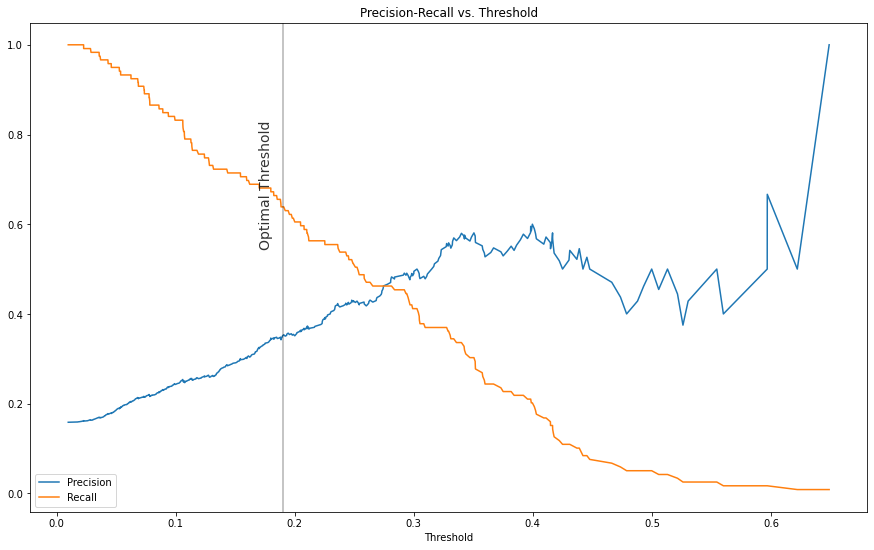

In [523]:
ax = threshold_df_ben.plot(figsize=(15,9))
ax.set_xlabel('Threshold')
ax.set_title('Precision-Recall vs. Threshold')
ax.axvline(0.19, color='black', alpha=0.3)
ax.text(.17,.55,'Optimal Threshold',rotation=90, alpha=0.8, fontsize=14)

Here, we see recall dropping quite rapidly. To maintain a precision of at least 0.25 while maximizing recall, we will choose an optimal threshold of 0.19. 

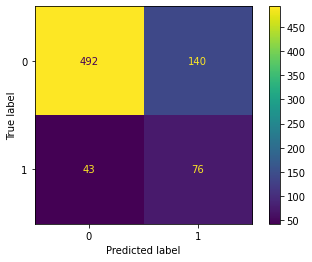

In [524]:
cm = confusion_matrix(y_test.benzos, lr_ben.predict_proba(X_test)[:,1] > 0.19)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [525]:
print(classification_report(y_test.benzos, lr_ben.predict_proba(X_test)[:,1] > .19))

              precision    recall  f1-score   support

           0       0.92      0.78      0.84       632
           1       0.35      0.64      0.45       119

    accuracy                           0.76       751
   macro avg       0.64      0.71      0.65       751
weighted avg       0.83      0.76      0.78       751

